In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
class LogReg:
    def __init__(self, Lr=0.01, iter=1000):
        self.Lr = Lr
        self.iter = iter
        self.wts = None
        self.w0 = None
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.wts = np.zeros(n_features)
        self.w0 = 0
        
        for i in range(self.iter):
            yhat = np.dot(X, self.wts) + self.w0
            ypred = self.sigmoid(yhat)
            
            self.wts -= self.Lr * np.dot(X.T, (ypred - y))
            self.w0 -= self.Lr * np.sum(ypred - y)
    
    def predict(self, X):
        yhat = np.dot(X, self.wts) + self.w0
        ypred = self.sigmoid(yhat)
        predicted_class = [1 if i > 0.5 else 0 for i in ypred]
        return predicted_class

In [16]:

df = pd.read_csv('BankNote_Authentication.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

outlier_indices = np.random.choice(X_train.shape[0], size=int(0.05 * X_train.shape[0]), replace=False)
X_train[outlier_indices] += np.random.normal(0, 5, size=X_train[outlier_indices].shape)

model = LogReg(Lr=0.01, iter=1000)
model.fit(X_train, y_train)

In [17]:
predTrain = model.predict(X_train)
predTest = model.predict(X_test)

train_accuracy = np.mean(predTrain == y_train)
test_accuracy = np.mean(predTest == y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9626253418413856
Test accuracy: 0.9818181818181818


In [18]:
class MulticlassLogReg:
    def __init__(self, Lr=0.01, iter=1000):
        self.Lr = Lr
        self.iter = iter
        self.wts = None
        self.w0 = None
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        self.wts = np.zeros((n_features, n_classes))
        self.w0 = np.zeros(n_classes)
        
        for _ in range(self.iter):
            model = np.dot(X, self.wts) + self.w0
            ypred = self.softmax(model)
            
            yTrueOneHotEncoded = np.eye(n_classes)[y]
            
            self.wts -= self.Lr * np.dot(X.T, (ypred - yTrueOneHotEncoded))
            self.w0 -= self.Lr * np.sum(ypred - yTrueOneHotEncoded, axis=0)
    
    def predict(self, X):
        model = np.dot(X, self.wts) + self.w0
        ypred = self.softmax(model)
        return np.argmax(ypred, axis=1)

In [19]:
# Create the dataset
np.random.seed(0)
nSamplePerClass = 1000
classMeans = [(2, 2), (-2, 2), (2, -2), (-2, -2)]
X = []
y = []

for cid, (xmean, ymean) in enumerate(classMeans):
    X.append(np.random.normal(loc=[xmean, ymean], scale=0.1, size=(nSamplePerClass, 2)))
    y.append(np.full(nSamplePerClass, cid))

X = np.vstack(X)
y = np.concatenate(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MulticlassLogReg(Lr=0.1, iter=1000)
model.fit(X_train, y_train)

In [20]:
predTrain = model.predict(X_train)
predTest = model.predict(X_test)

train_accuracy = np.mean(predTrain == y_train)
test_accuracy = np.mean(predTest == y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 1.0


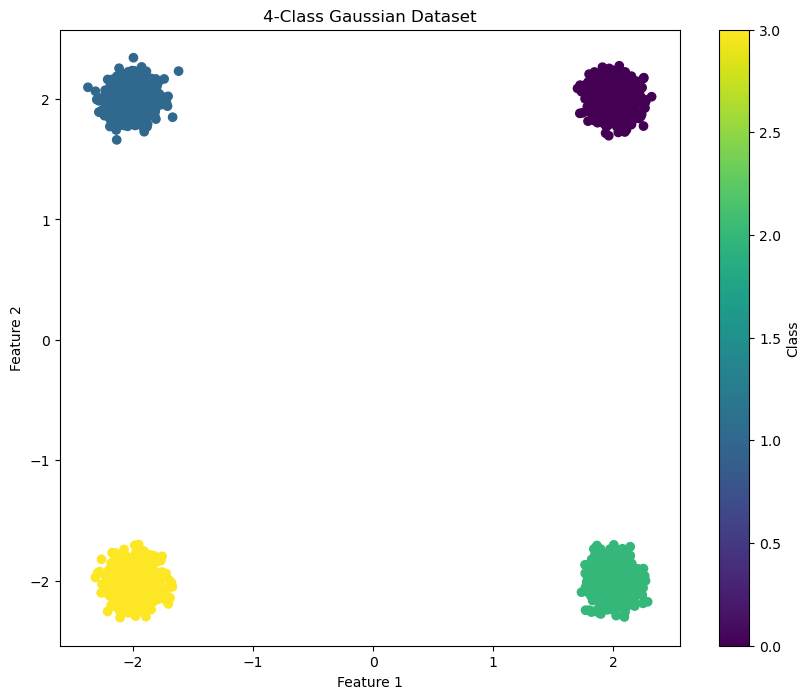

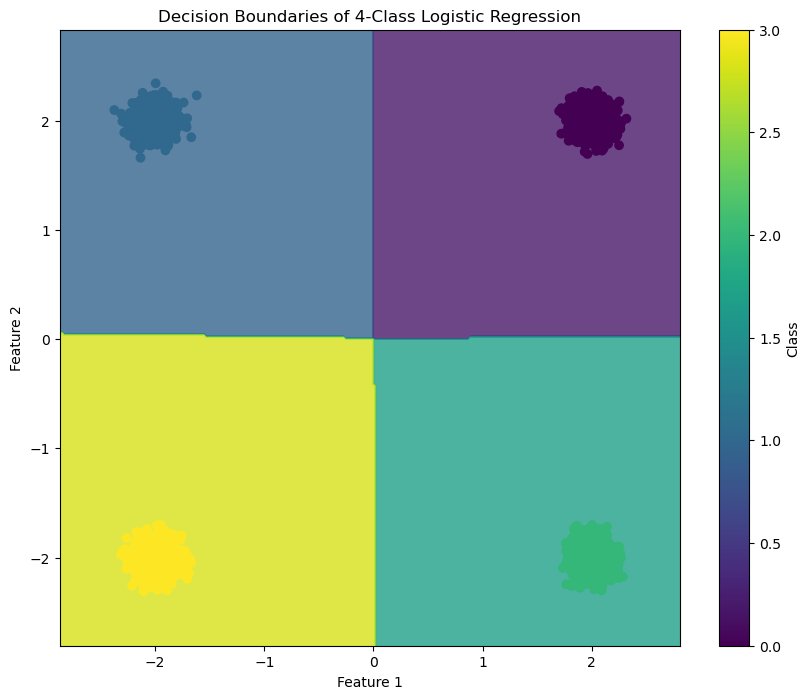

In [21]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("4-Class Gaussian Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of 4-Class Logistic Regression")
plt.colorbar(label="Class")
plt.show()